# **1. EDA**
Performing initial investigations on the transformed data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

# **2. Initialization**
Here is where you load all the dependencies required for the good execution of (most of) the notebook. Here is where you load your libraries and instantiate your functions/classes. Here is where you load the data/models/pipelines that are going to be used in the notebook.

## **2.1 Loading libraries**

In [2]:
import numpy as np
import pandas as pd

from tkinter import Tk
from tkinter.filedialog import askopenfilename #file-opening GUI

import time, datetime

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## **2.3 Loading data**

In [4]:
df = pd.read_csv('BPI_Challenge_2012-training.csv')
test = pd.read_csv('BPI_Challenge_2012-test.csv')

df.drop(columns = ['eventID '], inplace=True) # Drop eventID

## **2.2 Functions**

#### **2.2.1 Function 'read_data'**

In [13]:
def read_data(path: str):
    """Reads in a .csv file as a Pandas DataFrame with the opening of the file via a .

    Args:
        path (str): pathname to the .csv file 

    Returns:
        pd.DataFrame: Readed in .csv file as a pd.DataFrame
    """
    dataframe = pd.read_csv(path)
    return dataframe


def read_data_GUI():
    """Reads in a .csv file as a Pandas DataFrame with the opening of the file via a GUI.

    Returns:
        pd.DataFrame: Readed in .csv file as a pd.DataFrame
    """
    Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
    path = askopenfilename() # show an "Open" dialog box and return the path to the selected file
    dataframe = pd.read_csv(path)
    return dataframe
  

    
def month(x):
    return x.month

def day(x):
    return x.day

def week(x):
    return x.week

def day_week(x):
    
    return x.weekday()

# **3. EDA**
The main part of the topics depend a lot on what are the objectives of the notebook, and should be customized for each analysis. It is a good practice to write the analysis of the results obtained in each individual experiment (if any).

## **3.1 Distributions**

In [7]:
df_case_name = df.sort_values(by=['case concept:name'],) #dataframe reformat to sorted cases
# df_case_name.head(30)

df.head(5) #Show top 5 rows of df

,case concept:name,case REG_DATE,case AMOUNT_REQ,event org:resource,event concept:name,event lifecycle:transition,event time:timestamp
0,173688,01-10-2011 00:38:44.546,20000,112.000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546
1,173688,01-10-2011 00:38:44.546,20000,112.000,A_PARTLYSUBMITTED,COMPLETE,01-10-2011 00:38:44.880
2,173688,01-10-2011 00:38:44.546,20000,112.000,A_PREACCEPTED,COMPLETE,01-10-2011 00:39:37.906
3,173688,01-10-2011 00:38:44.546,20000,112.000,W_Completeren aanvraag,SCHEDULE,01-10-2011 00:39:38.875
4,173691,01-10-2011 08:08:58.256,5000,112.000,A_SUBMITTED,COMPLETE,01-10-2011 08:08:58.256


In [8]:
df.dtypes #Datatypes per column

case concept:name               int64
case REG_DATE                  object
case AMOUNT_REQ                 int64
event org:resource            float64
event concept:name             object
event lifecycle:transition     object
event time:timestamp           object
dtype: object

In [9]:
#See how many NaN values per feature
df.isna().sum()

case concept:name                 0
case REG_DATE                     0
case AMOUNT_REQ                   0
event org:resource            17838
event concept:name                0
event lifecycle:transition        0
event time:timestamp              0
dtype: int64

In [10]:
#Distribution per type of event
df.groupby(['event concept:name'])['event concept:name'].count().sort_values(ascending=False) 

event concept:name
W_Completeren aanvraag            49310
W_Nabellen offertes               46628
W_Nabellen incomplete dossiers    22447
W_Valideren aanvraag              19145
W_Afhandelen leads                15953
A_PARTLYSUBMITTED                 12478
A_SUBMITTED                       12478
A_DECLINED                         7590
A_PREACCEPTED                      6758
O_CREATED                          6270
O_SELECTED                         6270
O_SENT                             6270
A_ACCEPTED                         4583
A_FINALIZED                        4487
O_CANCELLED                        3346
O_SENT_BACK                        3167
A_CANCELLED                        2691
A_ACTIVATED                        2126
A_REGISTERED                       2126
A_APPROVED                         2126
O_ACCEPTED                         2123
O_DECLINED                          760
W_Beoordelen fraude                 642
W_Wijzigen contractgegevens          12
Name: event concept:n

event lifecycle:transition
COMPLETE    151130
START        64510
SCHEDULE     24146
Name: event lifecycle:transition, dtype: int64


event lifecycle:transition
COMPLETE    AxesSubplot(0.125,0.11;0.775x0.77)
SCHEDULE    AxesSubplot(0.125,0.11;0.775x0.77)
START       AxesSubplot(0.125,0.11;0.775x0.77)
Name: event lifecycle:transition, dtype: object

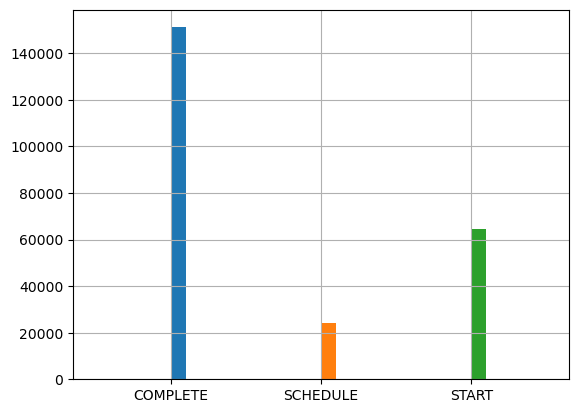

In [11]:
#Distribution per status of event
print(df.groupby(['event lifecycle:transition'])['event lifecycle:transition'].count().sort_values(ascending=False) )
df.groupby(['event lifecycle:transition'])['event lifecycle:transition'].hist()

### **3.1.1 Results**
- Event_ID is unnecessary, given it is unique per event and not important for sequence creation.
- case REG_DATE is a string --> Conversion to datetime could be nice
- event time:timestamp is a string --> Conversion to datetime could be nice
- event org:resource has NaN values (17838 tuples)

## **3.2 Some preprocessing**

In [12]:
# Transform 'event time:timestamp' and 'case REG_DATE' from str to DateTime
df['case REG_DATE'] =  pd.to_datetime(df['case REG_DATE'])
df['event time:timestamp'] =  pd.to_datetime(df['event time:timestamp'])
df['timestamp_start'] = df['case REG_DATE'].values.astype(np.int64) // 10 ** 9
df['timestamp_finish'] = df['event time:timestamp'].values.astype(np.int64) // 10 ** 9
df['time_to_complete'] = df['timestamp_finish'] - df['timestamp_start']

#df["event_cycle_encode"]=df["event lifecycle:transition"].apply(encode)
df["day_week"]=df["event time:timestamp"].apply(day_week)
# df["week"]=df["event time:timestamp"].apply(week)
df["day_month"]=df["event time:timestamp"].apply(day)
# df["month"]=df["event time:timestamp"].apply(month)

# commented out month and week, should talk about it

# for encoding the categories, not sure if needed
lifecycle_enc={"COMPLETE":0,"SCHEDULE":1,"START":2}
events = list(df['event concept:name'].unique())
event_codes = range(len(events))
event_enc = dict(zip(events, event_codes))


df.head()


,case concept:name,case REG_DATE,case AMOUNT_REQ,event org:resource,event concept:name,event lifecycle:transition,event time:timestamp,timestamp_start,timestamp_finish,time_to_complete,day_week,day_month
0,173688,2011-01-10 00:38:44.546,20000,112.000,A_SUBMITTED,COMPLETE,2011-01-10 00:38:44.546,1294619924,1294619924,0,0,10
1,173688,2011-01-10 00:38:44.546,20000,112.000,A_PARTLYSUBMITTED,COMPLETE,2011-01-10 00:38:44.880,1294619924,1294619924,0,0,10
2,173688,2011-01-10 00:38:44.546,20000,112.000,A_PREACCEPTED,COMPLETE,2011-01-10 00:39:37.906,1294619924,1294619977,53,0,10
3,173688,2011-01-10 00:38:44.546,20000,112.000,W_Completeren aanvraag,SCHEDULE,2011-01-10 00:39:38.875,1294619924,1294619978,54,0,10
4,173691,2011-01-10 08:08:58.256,5000,112.000,A_SUBMITTED,COMPLETE,2011-01-10 08:08:58.256,1294646938,1294646938,0,0,10


# **4 Naive estimators**


# **5 Results (if any)**
Here is where you summarize all the results of the analysis as a whole.